In [1]:
import igraph
import numpy as np
import pandas as pd

# Merge data
merge the rows indexed by same names

In [60]:
df = pd.read_excel("支持信息.xls", sheet_name='Homo', index_col=0)
df = df.fillna(0).astype(int)
df2 = pd.read_excel("支持信息2.xls", sheet_name='Homo', index_col=0)
df2 = df2.fillna(0).astype(int)

common_names = list(set(df.columns).intersection(set(df2.columns)))
print(len(common_names))

names_to_add = list(set(df2.columns).difference(set(df.columns)))
idx = np.argsort([list(df2.columns).index(n) for n in names_to_add])
names_to_add = [names_to_add[i] for i in idx]
print(names_to_add)

193
['左前脑', '右前脑', '左中脑', '右中脑', '左后脑', '右后脑', '脊髓']


In [61]:
# check if the common fields of the two dataframes are identical
(df.loc[common_names, common_names] == df2.loc[common_names, common_names]).to_numpy().min()

True

In [79]:
# add
new_df = df.copy()

for n in names_to_add:
    new_df[n] = 0
    
for n in names_to_add:
    new_df = pd.concat([new_df, df2.loc[[n]]])

for n in names_to_add:
    new_df[n] = new_df.loc[n]
    
new_df= new_df.fillna(0).astype(int)

# check symmetry
for n in new_df.columns:
    if min(new_df.loc[n]==new_df[n]) == 0:
        print(n)
new_df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,右眼上斜肌,左眼外直肌,右眼外直肌,左前脑,右前脑,左中脑,右中脑,左后脑,右后脑,脊髓
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
左中脑,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
右中脑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
左后脑,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
右后脑,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0


In [80]:
new_df.to_excel("merged_data.xls")

/tmp/ipykernel_2440777/882104246.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  new_df.to_excel("a.xls")


# Data cleaning

In [83]:
df = pd.read_excel("merged_data.xls", 
                   sheet_name='Homo',
                   index_col=0)
df = df.fillna(0).astype(int)
df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,右眼上斜肌,左眼外直肌,右眼外直肌,左前脑,右前脑,左中脑,右中脑,左后脑,右后脑,脊髓
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
左中脑,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
右中脑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
左后脑,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
右后脑,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0


## Check names

In [84]:
# check names

col_names = list(df.columns)
row_names = list(df.index)
print("# colume names", len(col_names))
print("# row names", len(row_names))
print("names only existing in columes:", set(col_names)-set(row_names))
print("names only existing in rows:", set(row_names)-set(col_names))

names = set(col_names).intersection(row_names)
names = list(names)
print("# intersection names", len(names))

print(col_names==row_names)

# colume names 252
# row names 252
names only existing in columes: set()
names only existing in rows: set()
# intersection names 252
True


In [86]:
fil_df = df.loc[col_names, col_names]
fil_df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,右眼上斜肌,左眼外直肌,右眼外直肌,左前脑,右前脑,左中脑,右中脑,左后脑,右后脑,脊髓
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
左中脑,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
右中脑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
左后脑,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
右后脑,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0


In [87]:
# save
fil_df.to_csv("filtered_data.csv")

## Check adjacent matrix

In [88]:
def check_sym(df: pd.DataFrame, r, c):
    if df.iloc[r, c] != df.iloc[c, r]:
        print(df.index[r], df.columns[c])

In [89]:
arr = fil_df.to_numpy()
print('max', arr.sum(1).max())
print('sum', arr.sum())
arr

max 63
sum 1688


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [90]:
arr.trace()

0

In [91]:
idx = np.where(arr!=arr.T)
idx

(array([], dtype=int64), array([], dtype=int64))

In [92]:
for i, j in zip(*idx):
    if i < j:
        check_sym(fil_df, i, j)

In [93]:
# save to csv
df2 = fil_df.copy()
for i, j in zip(*idx):
    df2.iloc[i, j] = 1
arr = df2.to_numpy()
print(arr.trace())
print(np.all(arr.T==arr))
print("max", np.max(arr.sum(1)))
print("sum", np.sum(arr))

0
True
max 63
sum 1688


In [94]:
df2.to_csv('filtered_data.csv')
del df2

# NIMS

In [99]:
df = pd.read_csv('filtered_data.csv', index_col=0)
print(len(df))
arr = df.to_numpy()
print('sum', arr.sum())
print('trace', arr.trace())
print('max', np.max(arr.sum(1)))
df

252
sum 1688
trace 0
max 63


,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,右眼上斜肌,左眼外直肌,右眼外直肌,左前脑,右前脑,左中脑,右中脑,左后脑,右后脑,脊髓
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
左中脑,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
右中脑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
左后脑,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
右后脑,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0


In [138]:
# construct a graph from an adjacent matrix
adj_mat = df.to_numpy()
g = igraph.Graph.Adjacency(adj_mat, mode='undirected')
g.vs["name"] = df.columns
#print(g)

In [101]:
for i in range(1000):
    idx = np.random.randint(0, len(df), 2)
    r_name, c_name = df.columns[idx[0]], df.columns[idx[1]]
    r, c = list(df.index).index(r_name), list(df.columns).index(c_name)
    ei = len(g.es.select(_within=[g.vs.find(name=r_name).index, g.vs.find(name=c_name).index]))
    if df.loc[r_name, c_name] != ei:
        print(r_name, c_name, df.loc[r_name, c_name], ei)
        print(arr[r, c], r, c)
        print(g.vs.find(name=r_name), g.vs.find(name=c_name))
        print()

In [17]:
len(g.es.select(_within=[g.vs.find(name=r_name), g.vs.find(name=c_name)]))

0

In [103]:
g.get_eid(59, 196, error=False)

-1

In [104]:
len(g.es.select(_within=[59, 196]))

0

In [102]:
g.vs.find(name='右舌下神经核')

igraph.Vertex(<igraph.Graph object at 0x7fcee44978b0>, 59, {'name': '右舌下神经核'})

In [118]:
g.write("a.lgl")

/home/kent/miniconda3/envs/torch1.10/lib/python3.9/site-packages/igraph/__init__.py:2988: RuntimeWarning: weights attribute does not exists at src/io/lgl.c:249
  return writer(f, *args, **kwds)


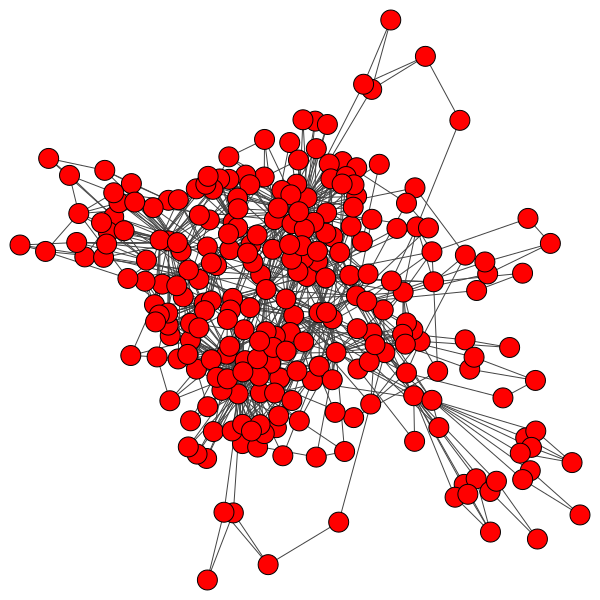

In [113]:
igraph.plot(g)

In [114]:
# connected components
np.unique(g.clusters().membership)

array([0])

In [115]:
cliques = np.array(g.clusters().membership)
for i in range(1, np.max(cliques)+1):
    a = np.where(cliques==i)[0]
    print(np.array(g.vs['name'])[a])

In [116]:
g.degree(g.vs.find('左内直肌'))

2

In [117]:
sub_g = g.subgraph(np.where(cliques==0)[0])
sub_g.get_edge_dataframe()

,source,target
edge ID,,
0,0,2
1,0,245
2,1,3
3,1,246
4,2,14
...,...,...
839,246,249
840,246,250
841,246,251


In [110]:
sub_g.write('a.lgl')

/home/kent/miniconda3/envs/torch1.10/lib/python3.9/site-packages/igraph/__init__.py:2988: RuntimeWarning: weights attribute does not exists at src/io/lgl.c:249
  return writer(f, *args, **kwds)


# Community detection

In [127]:
import seaborn as sns
import random

In [128]:
sns.color_palette(palette='tab20')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

In [149]:
# modules
cluster = g.community_walktrap()

subgraphs = cluster.subgraphs()
    
print(cluster.summary())

# color
#colors = [(*c, 1.0) for c in sns.color_palette(n_colors=10)]
#g.vs['color'] = [colors[i] for i in cluster.membership]

# plot
random.seed(80)

igraph.plot(cluster,
            layout=g.layout_fruchterman_reingold(),
            mark_groups=True, vertex_label=g.vs['name'], margin=(100, 100, 100, 100),
            #palette= igraph.drawing.colors.GradientPalette(colors[0], colors[7], 5),
            #palette= igraph.drawing.colors.GradientPalette('#00c51e', '#c5040e', 7),
           )

AttributeError: 'VertexDendrogram' object has no attribute 'subgraphs'

In [142]:
for s in subgraphs:
    print('，'.join(s.vs['name']))
    print()

左嗅觉细胞（嗅觉粘膜），左嗅脑，左侧右半视网膜，右侧右半视网膜，左丘脑外侧膝状体，左上丘，左大脑皮层视觉区，左大脑皮层听觉区，左大脑皮层中央前回底部，左大脑皮层味觉区，左丘脑腹后内侧核，右舌、会厌乳头，右面神经膝，左展神经核，右展神经核，左双极细胞，右双极细胞，左涡神经核，右涡神经核，右孤束核，右上神经节，右迷走神经背核，左脑膜，左眼外直肌，右眼外直肌，左前脑

右嗅觉细胞（嗅觉粘膜），右嗅脑，左侧左半视网膜，右侧左半视网膜，右丘脑外侧膝状体，右上丘，右大脑皮层视觉区，右大脑皮层听觉区，右大脑皮层中央前回底部，右大脑皮层味觉区，右丘脑腹后内侧核，右动眼神经核，右动眼神经副核，右滑车神经核，左舌、会厌乳头，左面神经膝，左孤束核，左上神经节，左迷走神经背核，右脑膜，右提上睑肌，右上直肌，右下直肌，右内直肌，右睫状肌，右瞳孔括约肌，左眼上斜肌，右前脑，右中脑

左大脑皮层中央后回底部，右大脑皮层中央后回底部，左三叉神经中脑核，右三叉神经中脑核，左三叉神经脑桥核，右三叉神经脑桥核，左三叉神经脊束核，右三叉神经脊束核，左三叉神经半月神经节，右三叉神经半月神经节，筛骨，左泪骨，右泪骨，左腭骨，右腭骨，梨骨，左锤骨，右锤骨，左砧骨，右砧骨，左镫骨，右镫骨，左腭舌肌

左动眼神经核，左动眼神经副核，左滑车神经核，左提上睑肌，左上直肌，左下直肌，左内直肌，左睫状肌，左瞳孔括约肌，右眼上斜肌，左中脑

左三叉神经运动核，右三叉神经运动核，枕骨，左顶骨，右顶骨，左颞骨，蝶骨，左颧骨，额骨，下颌骨，左下颌舌骨肌，右下颌舌骨肌，左二腹肌前腹，右二腹肌前腹，左腭帆张肌，右腭帆张肌，左咬肌，右咬肌，左颞肌，右颞肌，左翼外肌上头，右翼外肌上头，左翼外肌下头，右翼外肌下头，左翼内肌，右翼内肌，左咽上缩肌，右咽上缩肌

左面神经核，左帽状腱膜，左鼻骨，左上颌骨，左骨膜张肌，左镫骨肌，左颈阔肌，左枕肌，左耳后肌，左笑肌，左颧大肌，左颧小肌，左额肌，左颞顶肌，左耳前肌，左耳下肌，左眼轮匝肌，左降眉肌，左皱眉肌，左提上唇鼻翼肌，左降眉间肌，左颊肌，左提上唇肌，左鼻肌，左降鼻中隔肌，左提口角肌，左口轮匝肌，左降下唇肌，左降口角肌，左颏肌，左茎突舌骨肌，左二腹肌后腹，左后脑

右面神经核，右舌下神经核，右帽状腱膜，右颞骨，右颧骨，右鼻骨，右上颌骨，右骨膜张肌，右镫骨肌，右颈阔肌，右枕肌，右耳后肌，右笑肌，右颧大